[-0.28171271 -0.29058024 -0.32340041 -0.43909775 -0.41351777 -0.60357596
 -0.71529098 -0.61766955 -0.70064882 -0.79329914 -0.77881202 -0.95238565
 -0.90793236 -1.01131633 -0.90467936 -1.0147902  -0.98578422 -1.0823023
 -1.03149844 -0.93559077 -0.87617951 -0.92580256 -0.94154587 -0.83360457
 -0.74945501 -0.89287479 -0.74170342 -0.71303987 -0.76346406 -0.69731119
 -0.70678858 -0.71554926 -0.50622616 -0.49988435 -0.50844455 -0.46637703
 -0.55722808 -0.46582016 -0.44832954 -0.3846978  -0.39097563 -0.38179163
 -0.23812558 -0.12681925 -0.20952583  0.15768122  0.05659078  0.10664979
  0.28005471  0.26985012  0.31600072  0.38197442  0.46518398  0.58280884
  0.68291828  0.83949576  0.81672671  0.86604256  0.86369618  1.0540944
  0.91280218  0.91812399  0.94418415  0.96752569  1.11336257  0.91380487
  0.96290475  0.93195052  1.04222694  1.0169651   1.01522353  0.94654606
  0.94269893  0.93152468  0.91313055  0.93439365  1.0206759   1.0161985
  0.97860369  0.93100648  0.90315195  0.81006292  0.73

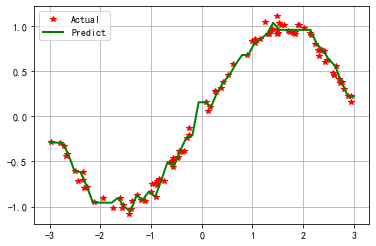

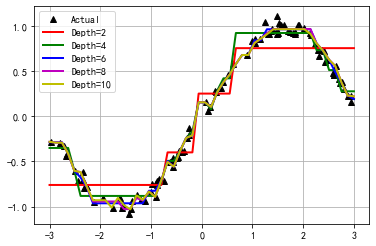

In [5]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


if __name__ == "__main__":
    N = 100
    x = np.random.rand(N) * 6 - 3     # [-3,3)
    x.sort()
    y = np.sin(x) + np.random.randn(N) * 0.05
    print(y)
    x = x.reshape(-1, 1)  # 转置后，得到N个样本，每个样本都是1维的
    #print(x)

    reg = DecisionTreeRegressor(criterion='squared_error', max_depth=9)
    dt = reg.fit(x, y)
    x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
    y_hat = dt.predict(x_test)
    plt.plot(x, y, 'r*', linewidth=2, label='Actual')
    plt.plot(x_test, y_hat, 'g-', linewidth=2, label='Predict')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

    # 比较决策树的深度影响
    depth = [2, 4, 6, 8, 10]
    clr = 'rgbmy'
    reg = [DecisionTreeRegressor(criterion='squared_error', max_depth=depth[0]),
           DecisionTreeRegressor(criterion='squared_error', max_depth=depth[1]),
           DecisionTreeRegressor(criterion='squared_error', max_depth=depth[2]),
           DecisionTreeRegressor(criterion='squared_error', max_depth=depth[3]),
           DecisionTreeRegressor(criterion='squared_error', max_depth=depth[4])]

    plt.plot(x, y, 'k^', linewidth=2, label='Actual')
    x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
    for i, r in enumerate(reg):
        dt = r.fit(x, y)
        y_hat = dt.predict(x_test)
        plt.plot(x_test, y_hat, '-', color=clr[i], linewidth=2, label='Depth=%d' % depth[i])
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()
